# K-Means Unsupervised Image Segmentation

In [ ]:
pip install scikit-image

### Setting up libraries

In [7]:
#Import necessary libraries

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv
import os

### EDA : Understanding the image dataset

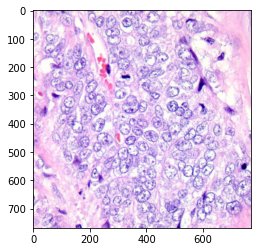

In [29]:
#Loading an image, converting it into an array and displaying the image array
img = Image.open('/Users/nemisha/Desktop/lung_colon_image_set/colon_image_sets/colon_aca/colonca1.jpeg')
x = np.array(img)
imshow(x)

In [5]:
#Checking the shape of the image dataset
z = np.dstack((x,rgb2hsv(x)))
z.shape

(768, 768, 6)

### Inference:
The K-Means clustering algorithm only takes 2 dimensional input. Hence the image data needs the X & Y dimension loaded into 1 spatial dimesion.



In [6]:
#The new dimensions are now 768*768 x 6 == 589824x6
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(589824, 6)

### Clustering: K- means clustering of data to identify patterns 

The algorithm starts with K cluster centroids that are randomly initialized.


All pixels are then assigned to their nearest cluster centroid.


The cluster centroids are then recalculated and this process repeats until convergence.

In [7]:
#Startin with 8 clusters. Hence, Selecting K=8 for starting.

kmeans = KMeans(random_state=0, init='random', n_clusters=8)
labels = kmeans.fit_predict(vectorized)

## Segmentation from clustered images

#### Reshaping labels array back into X & Y dimensions to be able to view the images

In [8]:
#Currently vectorised data model output from K-means clustering
labels.shape

(589824,)

In [13]:
#Reshaping the data
pic = labels.reshape(768,768)

## Colon Tissue

### Case 1: Cancerous colon tissue

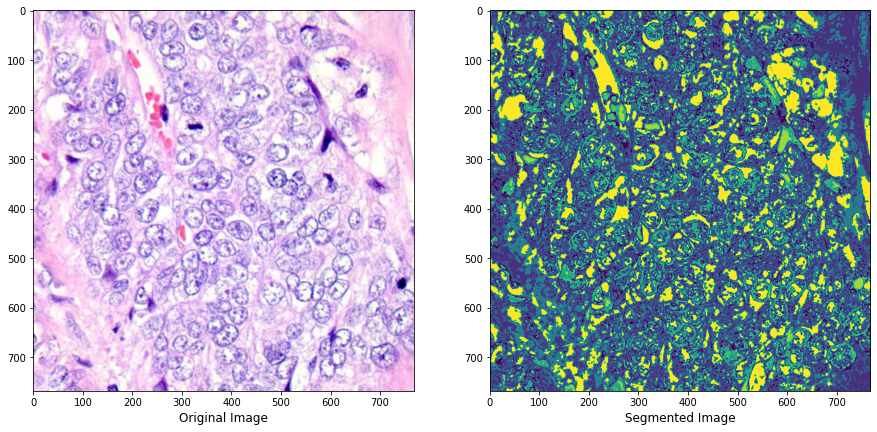

In [14]:
#Displaying the reshaped array as an image to better understand the segmented image
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)

### Case 2 : Normal Colon tissue

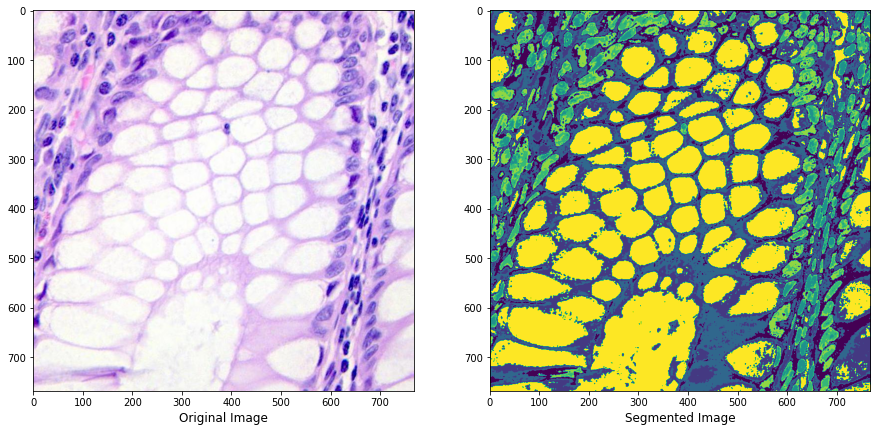

In [30]:
img = Image.open('/Users/nemisha/Desktop/lung_colon_image_set/colon_image_sets/colon_n/colonn1.jpeg')
x = np.array(img)
z = np.dstack((x,rgb2hsv(x)))
z.shape
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=7)
myimg = kmeans.fit_predict(vectorized)
pic = myimg.reshape(768,768)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)

### Observations:
    1. The areas on the image where the cells are normal have large areas of yellow colour in the segmented image.
    2. The areas with cancerous have very few sections of yellow and the darker green colour is prominent
    

### Inference:
    1. Segmentation allows easier classification of images in colon cancer image dataset by identifying 
       the distribution of the yellow region

## Lung tissue

### Case 1: Cancerous ACA lung tissue

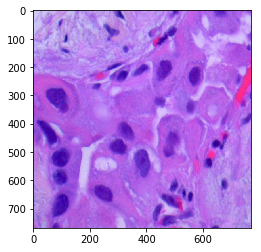

In [9]:
#Importing a cancerous lung tissue image
img1 = Image.open('/Users/jomjkandathil/Desktop/Nemz/ML Project/lung_colon_image_set/lung_image_sets/lung_aca/lungaca1.jpeg')
x1 = np.array(img1)
imshow(x1)

In [10]:
#Reshaping of the image
z = np.dstack((x1,rgb2hsv(x1)))
z.shape

(768, 768, 6)

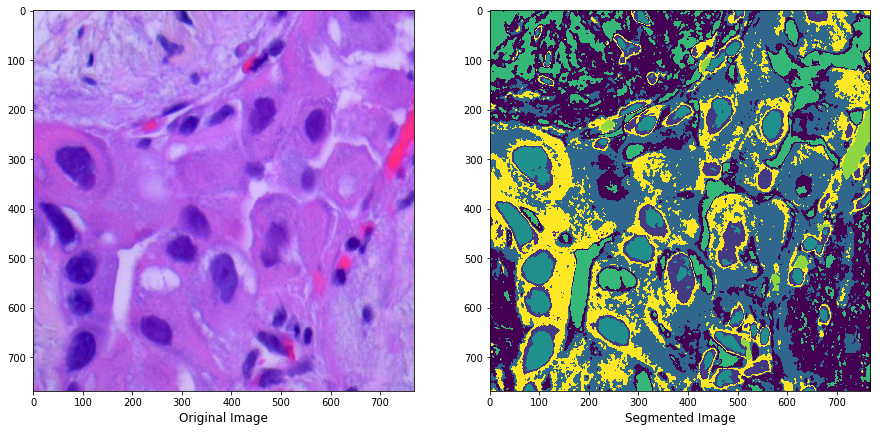

In [12]:
#Displaying the reshaped array as an image to better understand the segmented image
img1 = Image.open('/Users/nemisha/Desktop/lung_colon_image_set/lung_image_sets/lung_aca/lungaca1.jpeg')
x1 = np.array(img1)
z = np.dstack((x1,rgb2hsv(x1)))
z.shape
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=7)
myimg = kmeans.fit_predict(vectorized)
pic = myimg.reshape(768,768)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x1)
axarr[1].imshow(pic)

### Case 2: Normal ACA lung tissue

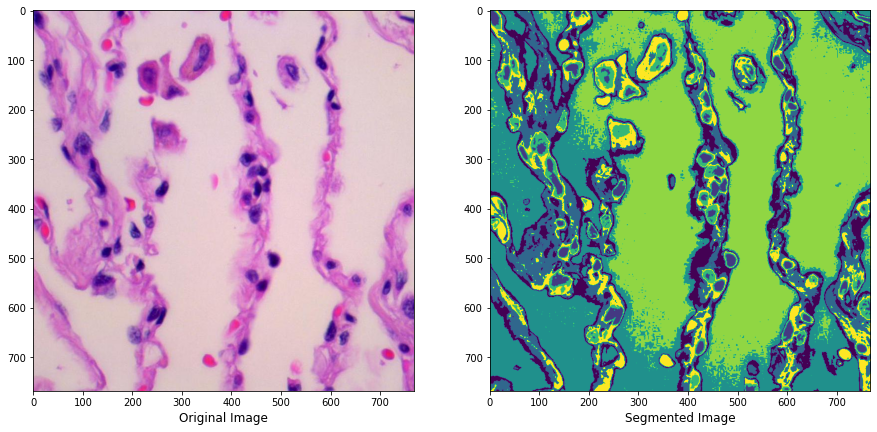

In [32]:
#Displaying the reshaped array as an image to better understand the segmented image
img2 = Image.open('/Users/nemisha/Desktop/lung_colon_image_set/lung_image_sets/lung_n/lungn1.jpeg')
x2 = np.array(img2)
z = np.dstack((x2,rgb2hsv(x2)))
z.shape
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=7)
myimg = kmeans.fit_predict(vectorized)
pic = myimg.reshape(768,768)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x2)
axarr[1].imshow(pic)

### Case 3: Cancerous ACA lung tissue

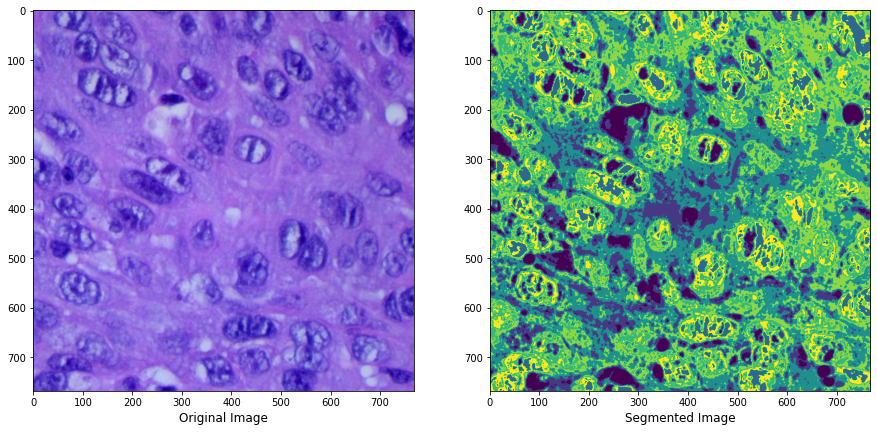

In [33]:
img3 = Image.open('/Users/nemisha/Desktop/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg')
x3 = np.array(img3)
z = np.dstack((x3,rgb2hsv(x3)))
z.shape
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=7)
myimg = kmeans.fit_predict(vectorized)
pic = myimg.reshape(768,768)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x3)
axarr[1].imshow(pic)

### Observations:
    1. The segmented images of healthy tissue is much less crowded than the cancerous tissue.
    2. The image where the cells are normal have large areas of light green colour in the segmented image.
    3. This is similar to the case with colon tissue with a difference in the shape. 
    4. The image with cancerous have very crowded segmentation patterns and very little areas that are just light   
       green in colour and are mainly a combination of yellow, green and black.
    

### Inference:
    1. Segmentation allows easier classification of images in colon cancer image dataset based on crowding, in 
       particular identifying the distribution of the green region